## Barkely and Astoria

* Barkley ans Astoria's bathymetries
* Particular features
* Thalweg shape
* Keep in mind for the lab canyon ...

In [4]:
import cmocean as cmo
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import seaborn as sns
from netCDF4 import Dataset

%matplotlib inline

In [5]:
sns.set_style('whitegrid')

SouthVIgrid.mat gives lat shape 1474, lon shape 890 and dpth shape (890,1474)

In [6]:
def get_topo():
     topo=sio.loadmat('/ocean/kramosmu/FalkorData/SouthVIgrid.mat')

     tDat = {'lon' : [], 'lat' : [], 'dpth' : []}

     tDat['lon'] = np.squeeze(np.array(topo['SouthVIgrid']['lon'][0][0]))
     tDat['lat'] = np.squeeze(np.array(topo['SouthVIgrid']['lat'][0][0]))
     tDat['dpth'] = np.squeeze(np.array(topo['SouthVIgrid']['depth'][0][0]))

     return tDat

In [7]:
astoria_file = '/ocean/kramosmu/MultipleCanyons/data/gebco_bathy_Astoria/GEBCO_2014_Astoria.nc'

with Dataset(astoria_file, 'r') as nbl:
    dep_Ast = nbl.variables['elevation'][:]
    lon_Ast = nbl.variables['lon'][:]
    lat_Ast = nbl.variables['lat'][:]


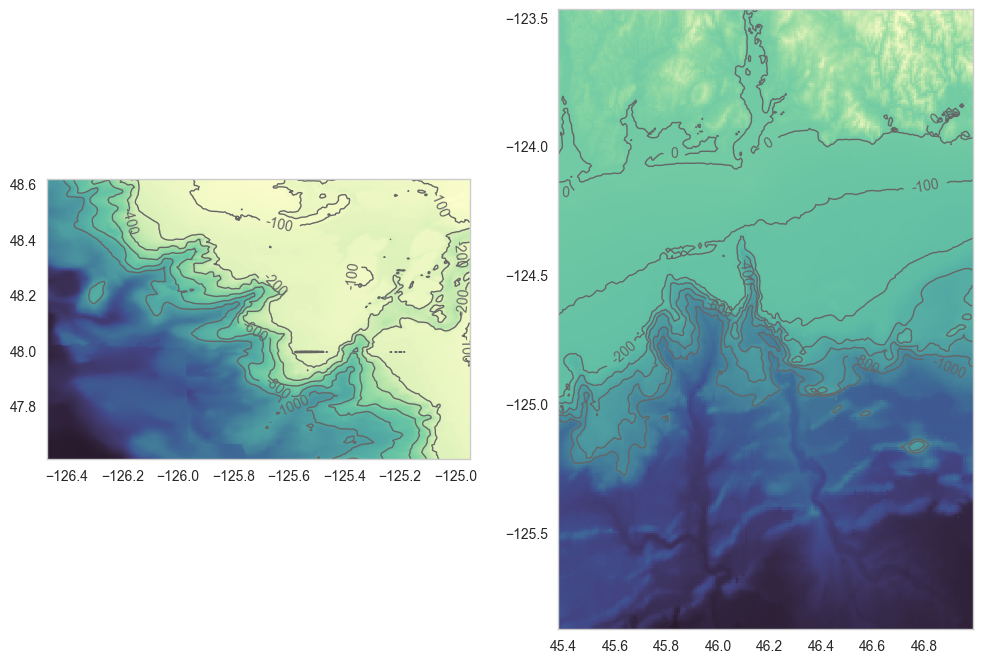

In [8]:
tDat = get_topo()

plt.rcParams['contour.negative_linestyle'] = 'solid'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))

ax1.pcolor(tDat['lon'][450:900],tDat['lat'][50:500],tDat['dpth'][50:500,450:900],cmap=cmo.cm.deep_r)
CS = ax1.contour(tDat['lon'][450:900],tDat['lat'][50:500],tDat['dpth'][50:500,450:900],
                 [-1000, -800, -600, -400, -200, -100, 0],colors='0.4',linewidths=[1])
ax1.clabel(CS, inline=1, fontsize=10,fmt='%1.0f')
ax1.set_aspect(1)

ax2.pcolor(lat_Ast,lon_Ast[15:-15],np.fliplr(np.transpose(dep_Ast[:,15:-15])),cmap=cmo.cm.deep_r)
CS2 = ax2.contour(lat_Ast,lon_Ast[15:-15],np.fliplr(np.transpose(dep_Ast[:,15:-15])),[-1000, -800, -600, -400, -200, -100, 0],colors='0.4',
                  linewidths=[1] )
ax2.clabel(CS2, inline=1, fontsize=10,fmt='%1.0f')
ax2.set_aspect(1)

### Find thalwegs

**Astoria** 

Nicely lines up E-W so find deepest points across the shelf for a box around the canyon.

In [9]:
lat_box = lat_Ast[80:113]
lon_box = lon_Ast[120:-120]
astoria = np.fliplr(np.transpose(dep_Ast[80:113,120:-120]))

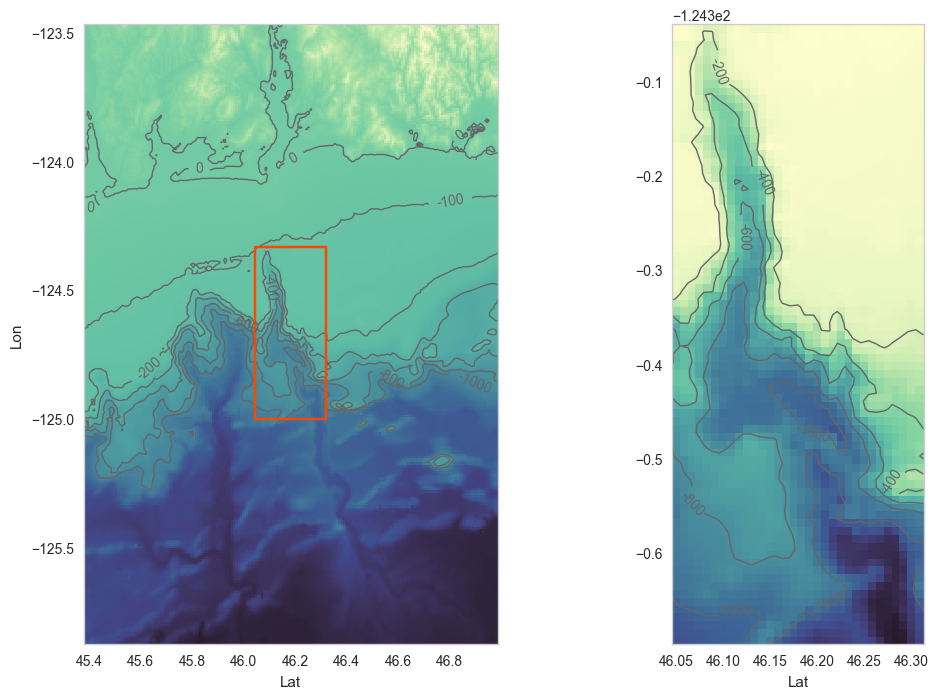

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))

ax1.pcolor(lat_Ast,lon_Ast[15:-15],np.fliplr(np.transpose(dep_Ast[:,15:-15])),cmap=cmo.cm.deep_r)
CS1 = ax1.contour(lat_Ast,lon_Ast[15:-15],np.fliplr(np.transpose(dep_Ast[:,15:-15])),[-1000, -800, -600, -400, -200, -100, 0],colors='0.4',
                  linewidths=[1] )
ax1.clabel(CS1, inline=1, fontsize=10,fmt='%1.0f')

# Plot box
ax1.plot((lat_Ast[80],lat_Ast[80],lat_Ast[113],lat_Ast[113],lat_Ast[80] ),
         (lon_Ast[120],lon_Ast[-120],lon_Ast[-120],lon_Ast[120],lon_Ast[120]), marker='', color='orangered')

ax2.pcolor(lat_box,lon_box,astoria,cmap=cmo.cm.deep_r)
CS2 = ax2.contour(lat_box, lon_box, astoria, [-1000, -800, -600, -400, -200, -100, 0],colors='0.4',
                  linewidths=[1] )
ax2.clabel(CS2, inline=1, fontsize=10,fmt='%1.0f')

ax1.set_ylabel('Lon')
ax1.set_xlabel('Lat')

ax2.set_xlabel('Lat')

ax1.set_aspect(1)
ax2.set_aspect(1)

In [11]:
# Find deepest points along longitude

print(np.shape(astoria))

thal_dep = np.min(astoria, axis=1)
thal_ind = np.argmin(astoria, axis=1)


(80, 33)


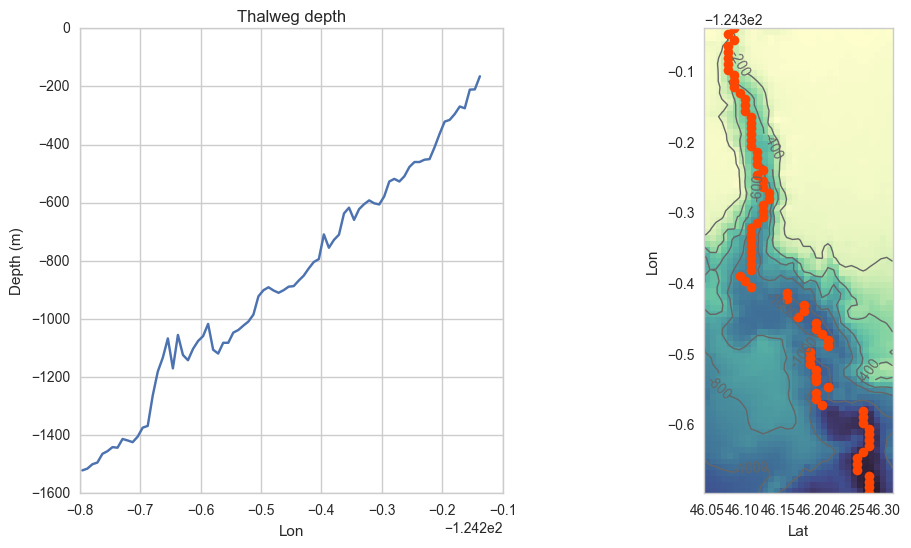

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.plot(lon_box, thal_dep)
ax1.set_title('Thalweg depth')
ax1.set_ylabel('Depth (m)')
ax1.set_xlabel('Lon')

ax2.pcolor(lat_box,lon_box,astoria,cmap=cmo.cm.deep_r)
CS2 = ax2.contour(lat_box, lon_box, astoria, [-1000, -800, -600, -400, -200, -100, 0],colors='0.4',
                  linewidths=[1] )
ax2.clabel(CS2, inline=1, fontsize=10,fmt='%1.0f')

ax2.plot(lat_box[thal_ind],lon_box, 'o', color='orangered')
ax2.set_ylabel('Lon')
ax2.set_xlabel('Lat')

ax2.set_aspect(1)

Convert lat-lon to km using Haversine fromula http://andrew.hedges.name/experiments/haversine/ 

In [37]:
def haversine(lon, lat):
    '''lon: np.array with longitudes
       lat: np array with latitudes
       returns: distance, np array with the distance between the points of lat, lon. Size is one less than lat, lon'''
    R = 6366.371 # km, Radius of earth at 48 deg N.
    dlon = lon[:-1] - lon[1:]
    dlat = lat[:-1] - lat[1:]
    a = (np.sin(dlat/2))**2 + (np.cos(lat[:-1]) * np.cos(lat[1:]) * (np.sin(dlon/2))**2)
    c = 2.0 * np.arctan2( np.sqrt(a), np.sqrt(1-a) )
    distance = R * c
    return distance

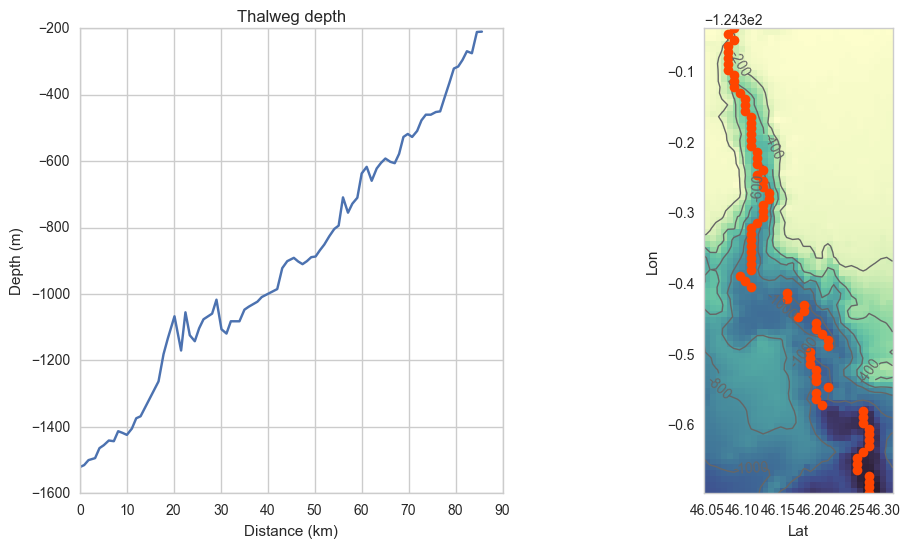

In [47]:
delta_thalweg = haversine(np.radians(lat_box[thal_ind]),np.radians(lon_box))

dist_thalweg = np.zeros(np.shape(delta_thalweg))


for ii in range(len(dist_thalweg)-1):
    ii = ii+1
    dist_thalweg[ii] = dist_thalweg[ii-1] + delta_thalweg[ii] 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.plot(dist_thalweg, thal_dep[:-1])
ax1.set_title('Thalweg depth')
ax1.set_ylabel('Depth (m)')
ax1.set_xlabel('Distance (km)')

ax2.pcolor(lat_box,lon_box,astoria,cmap=cmo.cm.deep_r)
CS2 = ax2.contour(lat_box, lon_box, astoria, [-1000, -800, -600, -400, -200, -100, 0],colors='0.4',
                  linewidths=[1] )
ax2.clabel(CS2, inline=1, fontsize=10,fmt='%1.0f')

ax2.plot(lat_box[thal_ind],lon_box, 'o', color='orangered')
ax2.set_ylabel('Lon')
ax2.set_xlabel('Lat')

ax2.set_aspect(1)

**Barkley**

In [42]:
lat_box2 = tDat['lat'][300:430]
lon_box2 = tDat['lon'][550:640]
barkley = tDat['dpth'][300:430,550:640]

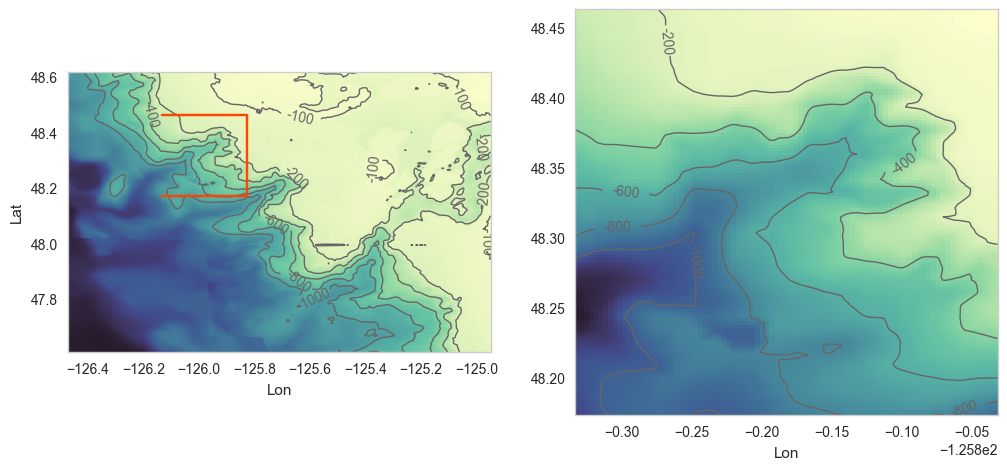

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))

ax1.pcolor(tDat['lon'][450:900],tDat['lat'][50:500],tDat['dpth'][50:500,450:900],cmap=cmo.cm.deep_r)
CS = ax1.contour(tDat['lon'][450:900],tDat['lat'][50:500],tDat['dpth'][50:500,450:900],
                 [-1000, -800, -600, -400, -200, -100, 0],colors='0.4',linewidths=[1])
ax1.clabel(CS, inline=1, fontsize=10,fmt='%1.0f')
ax1.set_aspect(1)

# Plot box
ax1.plot((tDat['lon'][550], tDat['lon'][640], tDat['lon'][640], tDat['lon'][550]),
         (tDat['lat'][300],tDat['lat'][300], tDat['lat'][430], tDat['lat'][430]), marker='', color='orangered')

ax2.pcolor(lon_box2,lat_box2,barkley,cmap=cmo.cm.deep_r)
CS2 = ax2.contour(lon_box2, lat_box2, barkley, [-1000, -800, -600, -400, -200, -100, 0],colors='0.4',
                  linewidths=[1] )
ax2.clabel(CS2, inline=1, fontsize=10,fmt='%1.0f')

ax1.set_xlabel('Lon')
ax1.set_ylabel('Lat')

ax2.set_xlabel('Lon')

ax1.set_aspect(1)
ax2.set_aspect(1)

In [49]:
# Find deepest points along longitude

print(np.shape(barkley))

thal_dep2 = np.min(barkley, axis=1)
thal_ind2 = np.argmin(barkley, axis=1)


(130, 90)


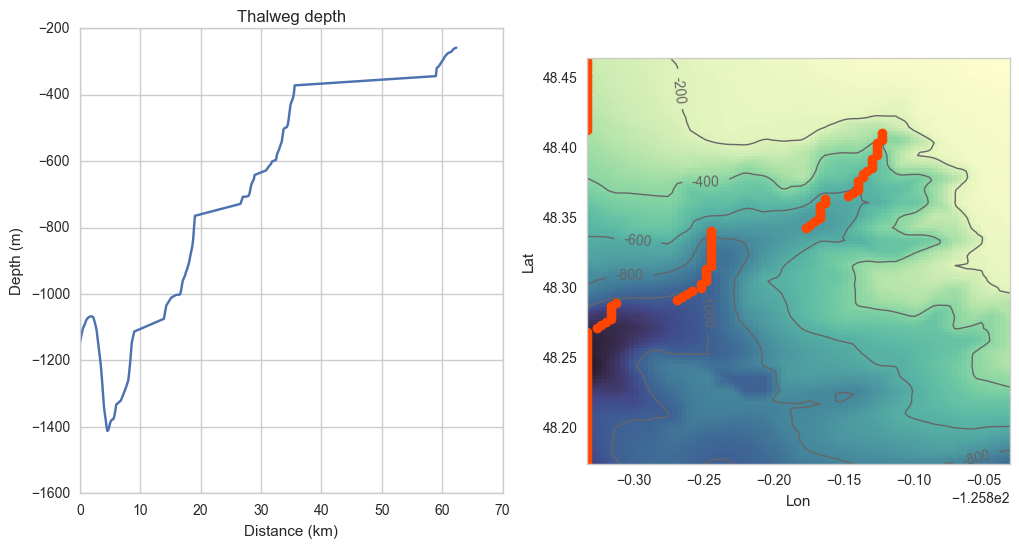

In [54]:
delta_thalweg2 = haversine(np.radians(lat_box2),np.radians(lon_box2[thal_ind2]))

dist_thalweg2 = np.zeros(np.shape(delta_thalweg2))

for ii in range(len(dist_thalweg2)-1):
    ii = ii+1
    dist_thalweg2[ii] = dist_thalweg2[ii-1] + delta_thalweg2[ii] 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.plot(dist_thalweg2, thal_dep2[:-1])
ax1.set_title('Thalweg depth')
ax1.set_ylabel('Depth (m)')
ax1.set_xlabel('Distance (km)')

ax2.pcolor(lon_box2,lat_box2,barkley,cmap=cmo.cm.deep_r)
CS2 = ax2.contour(lon_box2, lat_box2, barkley, [-1000, -800, -600, -400, -200, -100, 0],colors='0.4',
                  linewidths=[1] )
ax2.clabel(CS2, inline=1, fontsize=10,fmt='%1.0f')

ax2.plot(lon_box2[thal_ind2],lat_box2, 'o', color='orangered')
ax2.set_xlabel('Lon')
ax2.set_ylabel('Lat')

ax2.set_aspect(1)